In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
from geopy.geocoders import Nominatim
import folium

In [2]:
# Read in the data from the csv file
presidents_df = pd.read_csv('U.S. Presidents Birth and Death Information - Sheet1.csv')
presidents_df.tail(10)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
36,Gerald Ford,"July 14, 1913","Omaha, Nebraska","Dec 26, 2006","Rancho Mirage, Cal."
37,Jimmy Carter,"Oct 1, 1924","Plains, Georgia",NaN,NaN
38,Ronald Reagan,"Feb 6, 1911","Tampico, Illinois","June 5, 2004","Los Angeles, Cal."
39,George Bush,"June 12, 1924","Milton, Mass.","Nov 30, 2018","Houston, Texas"
40,Bill Clinton,"Aug 19, 1946","Hope, Arkansas",NaN,NaN
41,George W. Bush,"July 6, 1946","New Haven, Conn.",NaN,NaN
42,Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",NaN,NaN
43,Donald Trump,"June 14, 1946","New York, New York",NaN,NaN
44,Joe Biden,"Nov 20, 1942","Scranton, Pa.",NaN,NaN
45,"Reference:\nBirthplace, Birthdate, and Death i...",NaN,NaN,NaN,NaN


In [3]:
#deleting the last row
presidents_df=presidents_df.drop(presidents_df.index[-1])
presidents_df.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va."
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass."
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va."
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va."
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York"


In [4]:
# Convert the birth and death dates to datetime objects
presidents_df['BIRTH DATE'] = pd.to_datetime(presidents_df['BIRTH DATE'])
presidents_df['DEATH DATE'] = pd.to_datetime(presidents_df['DEATH DATE'])

In [5]:
# Calculate the year of birth and death
presidents_df['year_of_birth'] = presidents_df['BIRTH DATE'].dt.year
presidents_df['year_of_death'] = presidents_df['DEATH DATE'].dt.year


In [6]:
# Calculate the number of days each president lived

#presidents_df['lived_days'] = (presidents_df['DEATH DATE'] - presidents_df['BIRTH DATE']).dt.days #made a mistake in this by not considering already alive presidents.

today = pd.to_datetime(datetime.now().date()) # Now correcting and calculating alive presidents age to this date
presidents_df['lived_days'] = (presidents_df['DEATH DATE'].fillna(today) - presidents_df['BIRTH DATE']).dt.days
print(presidents_df['lived_days'][:5])

0    24767
1    33119
2    30397
3    31150
4    26729
Name: lived_days, dtype: int64


In [7]:
# Calculate the number of years and months each president lived
presidents_df['lived_years'] = presidents_df['lived_days'] // 365
presidents_df['lived_months'] = (presidents_df['lived_days'] % 365) // 30
print(presidents_df['lived_months'][:5])

0    10
1     8
2     3
3     4
4     2
Name: lived_months, dtype: int64


In [19]:
#view data
presidents_df.head(10)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,year_of_death,lived_days,lived_years,lived_months,century_of_birth
35,Richard Nixon,1913-01-09,"Yorba Linda, Cal.",1994-04-22,"New York, New York",1913,1994.0,29688,81,4,20
36,Gerald Ford,1913-07-14,"Omaha, Nebraska",2006-12-26,"Rancho Mirage, Cal.",1913,2006.0,34133,93,6,20
37,Jimmy Carter,1924-10-01,"Plains, Georgia",NaT,NaN,1924,NaN,35995,98,7,20
38,Ronald Reagan,1911-02-06,"Tampico, Illinois",2004-06-05,"Los Angeles, Cal.",1911,2004.0,34088,93,4,20
39,George Bush,1924-06-12,"Milton, Mass.",2018-11-30,"Houston, Texas",1924,2018.0,34504,94,6,20
40,Bill Clinton,1946-08-19,"Hope, Arkansas",NaT,NaN,1946,NaN,28003,76,8,20
41,George W. Bush,1946-07-06,"New Haven, Conn.",NaT,NaN,1946,NaN,28047,76,10,20
42,Barack Obama,1961-08-04,"Honolulu, Hawaii",NaT,NaN,1961,NaN,22539,61,9,20
43,Donald Trump,1946-06-14,"New York, New York",NaT,NaN,1946,NaN,28069,76,10,20
44,Joe Biden,1942-11-20,"Scranton, Pa.",NaT,NaN,1942,NaN,29371,80,5,20


In [10]:
# Create a table ranking the top 10 presidents from longest lived to shortest lived
longest_lived = presidents_df.sort_values('lived_days', ascending=False).head(10)
print('\n Longest lived presidents \n')
print(longest_lived[['PRESIDENT', 'lived_years', 'lived_months', 'lived_days']].to_string(index=False))

# Create a table ranking the top 10 presidents from shortest lived to longest lived
shortest_lived = presidents_df.sort_values('lived_days').head(10)
print('\n Shortest lived presidents \n')
print(shortest_lived[['PRESIDENT', 'lived_years', 'lived_months', 'lived_days']].to_string(index=False))


 Longest lived presidents 

       PRESIDENT  lived_years  lived_months  lived_days
    Jimmy Carter           98             7       35995
     George Bush           94             6       34504
     Gerald Ford           93             6       34133
   Ronald Reagan           93             4       34088
      John Adams           90             8       33119
  Herbert Hoover           90             3       32943
 Harry S. Truman           88             8       32373
   James Madison           85             4       31150
Thomas Jefferson           83             3       30397
   Richard Nixon           81             4       29688

 Shortest lived presidents 

         PRESIDENT  lived_years  lived_months  lived_days
   John F. Kennedy           46             6       16978
 James A. Garfield           49            10       18202
     James K. Polk           53             7       19583
   Abraham Lincoln           56             2       20516
    Chester Arthur           57    

In [11]:
# Calculate summary statistics for lived_days 

#method 1

mean = presidents_df['lived_days'].mean()
median = presidents_df['lived_days'].median()
mode = presidents_df['lived_days'].mode().iloc[0]
max_value = presidents_df['lived_days'].max()
min_value = presidents_df['lived_days'].min()
std_dev = presidents_df['lived_days'].std()

In [12]:
# Create a table with the summary statistics
print('\nStatistics for Lived Days (Method 1):\n')
summary_stats = pd.DataFrame({'Mean': [mean], 'Median': [median], 'Mode': [mode], 'Max': [max_value], 'Min': [min_value], 'Standard Deviation': [std_dev]})
print(summary_stats.to_string(index=False))


Statistics for Lived Days (Method 1):

        Mean  Median  Mode   Max   Min  Standard Deviation
26440.311111 26227.0 16978 35995 16978         4597.619576


In [13]:
print('\nStatistics for Lived Days (Method 2):\n')
lived_days_stats = presidents_df['lived_days'].describe()
lived_days_stats.loc['weighted_average'] = (presidents_df['lived_days'] * presidents_df['lived_years']).sum() / presidents_df['lived_years'].sum()
lived_days_stats = lived_days_stats[['count', 'mean', 'weighted_average', 'std', 'min', '25%', '50%', '75%', 'max']]
print(lived_days_stats.to_string())


Statistics for Lived Days (Method 2):

count                  45.000000
mean                26440.311111
weighted_average    27228.019462
std                  4597.619576
min                 16978.000000
25%                 23098.000000
50%                 26227.000000
75%                 29371.000000
max                 35995.000000


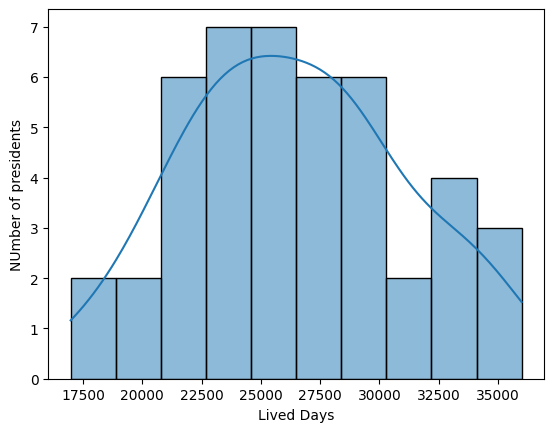

In [14]:
# # Create a plot showing the distribution of lived_days

# plt.hist(presidents_df['lived_days'], bins=10)
# plt.xlabel('Lived Days')
# plt.ylabel('Frequency')
# plt.show()

sns.histplot(presidents_df['lived_days'], kde=True, bins=10)
plt.xlabel('Lived Days')
plt.ylabel('NUmber of presidents')
plt.show()

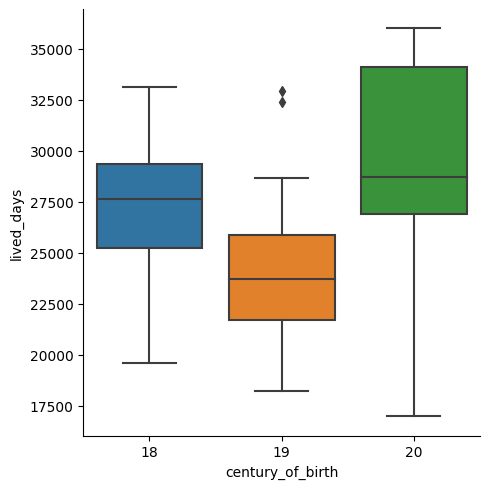

In [15]:
# Calculate the century of birth
presidents_df['century_of_birth'] = (presidents_df['year_of_birth'] - 1) // 100 + 1

# Create a plot showing the number of days each president lived depending on the century they were born in
import seaborn as sns
sns.catplot(x='century_of_birth', y='lived_days', data=presidents_df, kind='box')

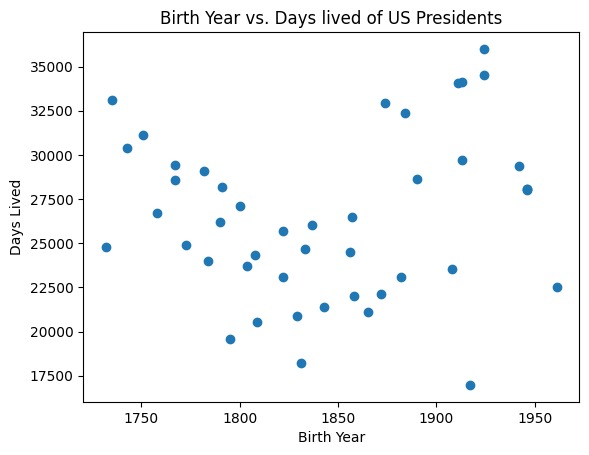

In [22]:
plt.scatter(presidents_df['year_of_birth'], presidents_df['lived_days'])

# set axis labels and title
plt.xlabel('Birth Year')
plt.ylabel('Days Lived')
plt.title('Birth Year vs. Days lived of US Presidents')

# show the plot
plt.show()

### misc. (just for fun)

In [ ]:
##plotting places the us presidents were born on a map

In [ ]:
# use geocoding to get latitude and longitude for locations
geolocator = Nominatim(user_agent="presidents_map")
presidents_df['location_coords'] = presidents_df['LOCATION OF DEATH'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude) if x is not None else None)

# create map showing where presidents have died
death_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
for row in presidents_df.iterrows():
    name = row[1]['PRESIDENT']
    coords = row[1]['location_coords']
    if coords is not None:
        folium.Marker(location=coords, popup=name + " died here.").add_to(death_map)

# create map showing where presidents were born
birth_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
for row in presidents_df.iterrows():
    name = row[1]['PRESIDENT']
    birthplace = row[1]['BIRTH PLACE']
    coords = geolocator.geocode(birthplace)
    if coords is not None:
        folium.Marker(location=(coords.latitude, coords.longitude), popup=name + " was born here.").add_to(birth_map)

# save maps to html files
death_map.save('presidents_death_map.html')
birth_map.save('presidents_birth_map.html')
